# Testing GraphSearch Distance Concepts

## Load Libraries

In [1]:
import srex_new_classes
from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords

#Download stopword
nltk.download('stopwords') 
nltk.download('punkt') # Tokenizers
nltk.download('wordnet') # Wordnet
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kianu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kianu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kianu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kianu\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Initialize some variables

In [2]:
# Stop Words
stop_words_list = stopwords.words('english') #a small one
newStopWords = get_stop_words('en') # a big one
stop_words_list.extend(newStopWords) # all together

In [3]:
query                    = '"internet of things" OR iot'
#query                    = '(((literature OR document OR information OR data) AND (retrieval OR retrieve)) OR (search AND engine)) AND (query AND (expansion OR refinement OR reformulation))'
nr_search_results        = 10

ranking_weight_type      = 'linear' # it can be: 'none', 'linear' or 'inverse'
lema                     = True
stem                     = False
summarize                = 'mean'   # it can be: 'mean' or 'median'
nr_of_graph_terms        = 10
limit_distance           = 4 
include_reference_terms  = True

In [4]:
ranking = srex_new_classes.Ranking(query, nr_search_results, ranking_weight_type, stop_words_list, lema, stem)

In [5]:
ranking.generate_all_graphs(nr_of_graph_terms, limit_distance, include_reference_terms, summarize)

In [6]:
for d in ranking.get_documents():
    print(f"TITLE: {d.get_title()} (id:{d.get_doc_id()})")
    for s in d.get_sentences():
        print(f"txt: {s.get_preprocessed_text()}")

TITLE: Information Retrieval in Search Engines Using Pseudo Relevance Feedback Mechanism (id:8899424)
txt: information retrieval search engine using pseudo relevance feedback mechanism
txt: online data generation increasing rapidly due technological development
txt: order handle huge volume data big data methodology used widely
txt: though big data able process huge data issue including information storage data management retrieving data
txt: big data data retrieval issue method data retrieval implementation environment differs
txt: though data mining become evolving technology requires optimal retrieval mechanism extract data information retrieval method turn effectively perform data retrieval term speed accuracy need implemented
txt: topic relevance mechanism used retrieve appropriate document repository document ranked based user preference using feedback mechanism
txt: hence accuracy retrieved document improved
TITLE: An Improved Sentence Embeddings based Information Retrieval Tech

In [7]:
for d in ranking.get_documents():
    print(f"doc: {d.get_title()}")
    for s in d.get_sentences():
        print(f"vecinity matrix: {s.get_vicinity_matrix()}")

doc: Information Retrieval in Search Engines Using Pseudo Relevance Feedback Mechanism
vecinity matrix: {'information': {'retrieval': [1.0, 0.0, 0.0, 0.0], 'search': [0.0, 1.0, 0.0, 0.0], 'engine': [0.0, 0.0, 1.0, 0.0]}, 'retrieval': {'information': [1.0, 0.0, 0.0, 0.0], 'search': [1.0, 0.0, 0.0, 0.0], 'engine': [0.0, 1.0, 0.0, 0.0]}, 'search': {'information': [0.0, 1.0, 0.0, 0.0], 'retrieval': [1.0, 0.0, 0.0, 0.0], 'engine': [1.0, 0.0, 0.0, 0.0]}, 'engine': {'information': [0.0, 0.0, 1.0, 0.0], 'retrieval': [0.0, 1.0, 0.0, 0.0], 'search': [1.0, 0.0, 0.0, 0.0]}, 'using': {'information': [0.0, 0.0, 0.0, 1.0], 'retrieval': [0.0, 0.0, 1.0, 0.0], 'search': [0.0, 1.0, 0.0, 0.0], 'engine': [1.0, 0.0, 0.0, 0.0]}, 'pseudo': {'retrieval': [0.0, 0.0, 0.0, 1.0], 'search': [0.0, 0.0, 1.0, 0.0], 'engine': [0.0, 1.0, 0.0, 0.0]}, 'relevance': {'search': [0.0, 0.0, 0.0, 1.0], 'engine': [0.0, 0.0, 1.0, 0.0]}, 'feedback': {'engine': [0.0, 0.0, 0.0, 1.0]}}
vecinity matrix: {'online': {'data': [1.0, 0.0, 

In [8]:
#Show graphs from the ranking class
print(ranking.get_graph())

SUBQUERY: (((((literature OR document) OR information) OR data) AND (retrieval OR retrieve)) OR (search AND engine)) AND (query AND ((expansion OR refinement) OR reformulation))
TERM: increase ; PONDERATION: 4.1 ; DISTANCE: 2.4
TERM: using ; PONDERATION: 3.9 ; DISTANCE: 2.0
TERM: technique ; PONDERATION: 3.9 ; DISTANCE: 2.0
TERM: learning ; PONDERATION: 3.8 ; DISTANCE: 3.0
TERM: behavior ; PONDERATION: 3.8 ; DISTANCE: 3.0
TERM: proximity ; PONDERATION: 3.7 ; DISTANCE: 2.5
TERM: search ; PONDERATION: 3.6 ; DISTANCE: 3.5
TERM: bangla ; PONDERATION: 3.5 ; DISTANCE: 1.5
TERM: urdu ; PONDERATION: 3.3 ; DISTANCE: 2.5
TERM: precision ; PONDERATION: 3.3 ; DISTANCE: 2.0


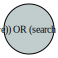

In [9]:
visual_graph1 = ranking.get_document_by_ranking_position(1).get_graph().get_graph_viz('0.7', 'deepskyblue')
visual_graph1

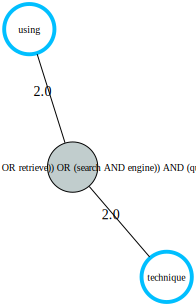

In [10]:
visual_graph2 = ranking.get_document_by_ranking_position(2).get_graph().get_graph_viz('0.7', 'deepskyblue')
visual_graph2

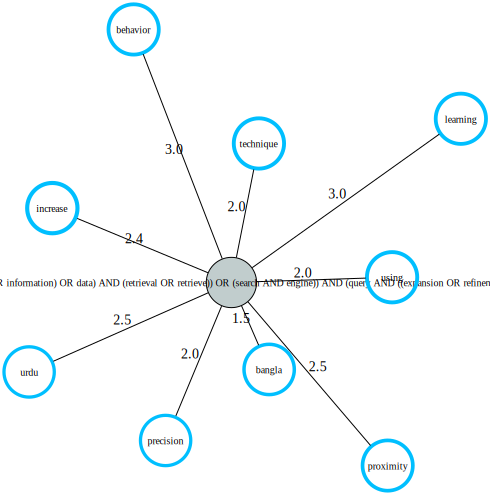

In [18]:
visual_graph = ranking.get_graph().get_graph_viz('0.7', 'deepskyblue')
visual_graph

In [12]:
ranking.get_graph().get_cosine_similarity(ranking.get_document_by_ranking_position(2).get_graph())

0.35702902674725095